In [1]:
# Import Data Manipulation libraries
import pandas as pd
import numpy as np 
import statistics 
import os

#Import Data Visualization libraries 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns

Merge all 12 files into one csv file 

In [2]:
#Confirm file is accessible 
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
df.head()

#List comprehension to load all files into a list

files = [file for file in os.listdir('./Sales_Data')]

files

['all_months.csv',
 'Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [3]:
#Create an empty dataframe to hold all 12 months of data 
total_files = pd.DataFrame()

#For loop to read through monthly files and merge/concat together into one csv file 
for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    total_files = pd.concat([total_files, df])
total_files

total_files.to_csv("./Sales_Data/all_months.csv", index=False)



In [4]:
#Read in the new combined data 

final_df = pd.read_csv("./Sales_Data/all_months.csv")

final_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
560545,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
560546,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
560547,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
560548,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Convert columns into appropriate data types for analysis

In [5]:
final_df[['Quantity Ordered', 'Price Each']] = final_df[['Quantity Ordered', 'Price Each']].apply(pd.to_numeric, errors='coerce')
final_df['Order Date'] = pd.to_datetime(final_df['Order Date'], errors='coerce')
final_df.dtypes

Order ID                    object
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [6]:
final_df = final_df.dropna(how='any')
                           
cleaned_df = final_df.reset_index(drop=True)

cleaned_df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


#### Pull month out of Order Date

In [7]:
cleaned_df['Month'] = pd.DatetimeIndex(cleaned_df['Order Date']).month
cleaned_df['Month'] = cleaned_df['Month'].astype(int)

#Import calendar to convert numerical value to string 
import calendar

cleaned_df['Month'] = cleaned_df['Month'].apply(lambda x: calendar.month_abbr[x])
cleaned_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr


#### Add Total Column: Quantity * Price Each


In [8]:
cleaned_df['Total Spent'] = cleaned_df['Quantity Ordered'] * cleaned_df['Price Each']
cleaned_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Spent
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,23.90
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,99.99
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,11.99


#### Add City and State Column

In [9]:
#Function to grab state 

def get_state(address):
    return address.split(',')[2].split(' ')[1]

#Function to grab city  
def get_city(address):
    return address.split(',')[1]

cleaned_df['City'] = cleaned_df['Purchase Address'].apply(lambda x: get_city(x) + ',' + get_state(x))

cleaned_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Spent,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,23.90,"Dallas,TX"
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,99.99,"Boston,MA"
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,"Los Angeles,CA"
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,"Los Angeles,CA"
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,11.99,"Los Angeles,CA"


### Question 1: What was the best month for sales? How much was earned in that month? 

In [10]:
total_sales =  cleaned_df.groupby('Month').sum()

total_sales.reset_index(inplace= True)

total_sales


#ou can use categorical data to enable proper sorting with pd.Categorical:

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
total_sales['Month'] = pd.Categorical(total_sales['Month'], categories=months, ordered=True)
total_sales.sort_values('Month')

,Month,Quantity Ordered,Price Each,Total Spent
4,Jan,32709.0,5.435305e+06,5.466770e+06
3,Feb,40347.0,6.566654e+06,6.606067e+06
7,Mar,51015.0,8.373623e+06,8.421301e+06
0,Apr,61674.0,1.010301e+07,1.017201e+07
8,May,56001.0,9.405375e+06,9.457820e+06
6,Jun,45759.0,7.686077e+06,7.733407e+06
5,Jul,48216.0,7.897619e+06,7.943327e+06
1,Aug,40344.0,6.691036e+06,6.733404e+06
11,Sep,39327.0,6.254976e+06,6.292680e+06
10,Oct,68109.0,1.114666e+07,1.121018e+07


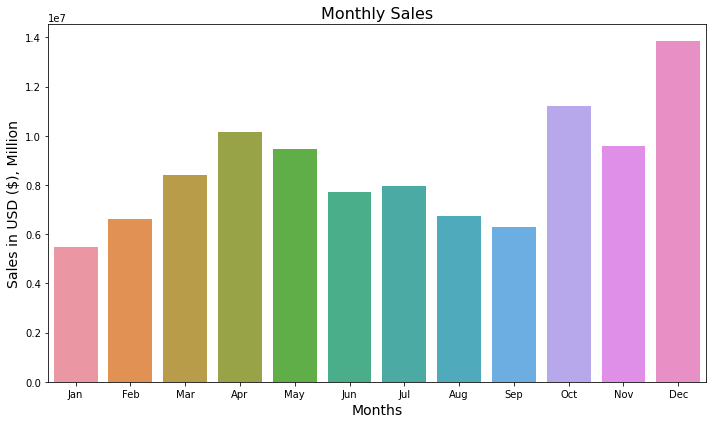

In [11]:
plt.figure(figsize=(10,6))

sns.barplot(x= 'Month', y='Total Spent', data=total_sales)
plt.ylabel('Sales in USD ($), Million', fontsize=14)
plt.xlabel('Months', fontsize=14)
plt.title('Monthly Sales', fontsize=16)
plt.tight_layout()

plt.savefig('./Images/monthly_sales.jpg')

### Question 2:  What city had the highest number of sales?

In [12]:
sales_city = cleaned_df.groupby('City').sum()

sales_by_city = sales_city.sort_values('Total Spent', ascending=False)
sales_by_city.reset_index(inplace= True)
sales_by_city


,City,Quantity Ordered,Price Each,Total Spent
0,"San Francisco,CA",150717.0,2.463439e+07,2.478661e+07
1,"Los Angeles,CA",99867.0,1.626431e+07,1.635771e+07
2,"New York City,NY",83796.0,1.390611e+07,1.399295e+07
3,"Boston,MA",67584.0,1.091223e+07,1.098493e+07
4,"Atlanta,GA",49806.0,8.339725e+06,8.386496e+06
5,"Dallas,TX",50190.0,8.257883e+06,8.303926e+06
6,"Seattle,WA",49659.0,8.199888e+06,8.243266e+06
7,"Portland,OR",33909.0,5.581675e+06,5.612197e+06
8,"Austin,TX",33459.0,5.429621e+06,5.458745e+06
9,"Portland,ME",8250.0,1.341568e+06,1.349275e+06


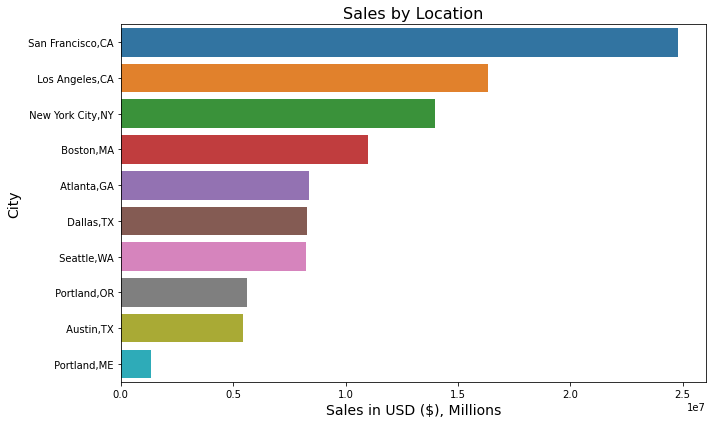

In [13]:
#Plot a horizontal chart 
plt.figure(figsize=(10,6))
sns.barplot(y ='City',x='Total Spent', data=sales_by_city)
plt.title('Sales by Location', fontsize =16)
plt.xlabel('Sales in USD ($), Millions', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.tight_layout()

plt.savefig('./Images/sales_by_city.jpg')

### What time should we display ads to maximize consumer purchasing behavior?

In [14]:
cleaned_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Spent,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,23.90,"Dallas,TX"
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,99.99,"Boston,MA"
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,"Los Angeles,CA"
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,"Los Angeles,CA"
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,11.99,"Los Angeles,CA"


In [15]:
#Pull the hour out of the datetime, Order Date 

cleaned_df['Hour'] = cleaned_df['Order Date'].dt.hour
cleaned_df['Minute'] = cleaned_df['Order Date'].dt.minute

cleaned_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Spent,City,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,23.90,"Dallas,TX",8,46
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,99.99,"Boston,MA",22,30
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,"Los Angeles,CA",14,38
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,"Los Angeles,CA",14,38
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,11.99,"Los Angeles,CA",9,27


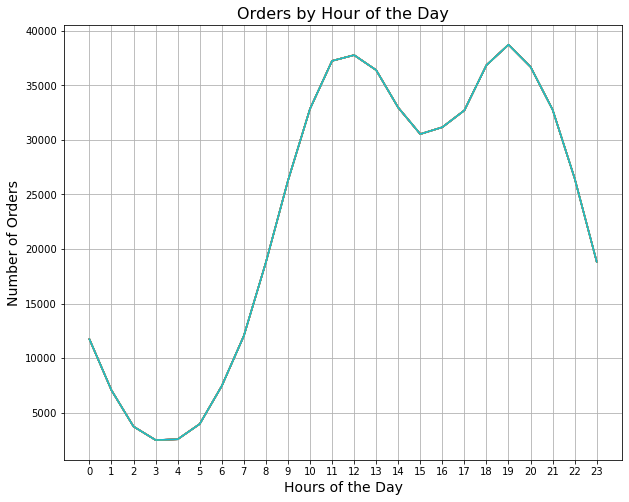

In [16]:
hours = [hour for hour, df in cleaned_df.groupby('Hour')]

plt.figure(figsize=(10,8))

plt.plot(hours,cleaned_df.groupby('Hour').count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hours of the Day', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.title('Orders by Hour of the Day', fontsize=16)

plt.savefig('./Images/orders_by_hour.jpg')
plt.show()

There are approximately 2 peaks at the data. They are 12 (12 PM) and 19 (7 PM). It makes sense since most people shopping during the day. From this data, we can suggest to our bussiness partner to advertise their product right before 12 PM and/or 7 PM. It could be 11.30 AM and/or 6.30 PM.

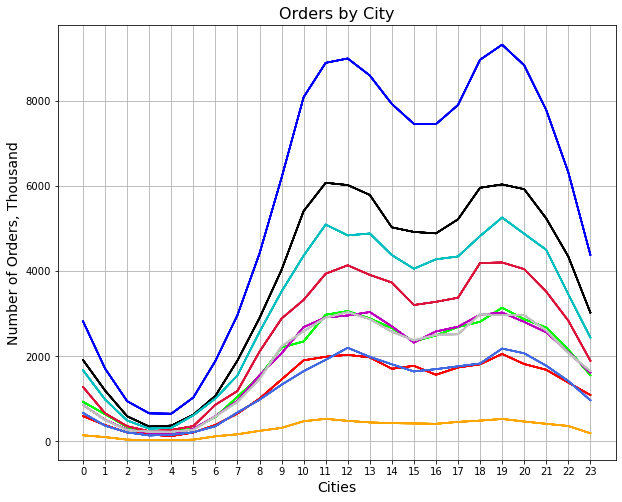

In [39]:
hours = [hour for hour, df in cleaned_df.groupby('Hour')]
plt.figure(figsize=(10,8))
#San Francisco 
sf = cleaned_df[cleaned_df['City'] == ' San Francisco,CA']

sf_data = sf.groupby('Hour').count()
plt.plot(hours, sf_data, color='b', label = 'San Francisco')
plt.xticks(hours)
plt.grid()

#Atlanta 
atl = cleaned_df[cleaned_df['City'] == ' Atlanta,GA']
atl_data = atl.groupby('Hour').count()
plt.plot(hours, atl_data, color='lime', label='Atlanta')
plt.xticks(hours)
plt.grid()

#Austin
atx =  cleaned_df[cleaned_df['City'] == ' Austin,TX']
atx_data = atx.groupby('Hour').count()
plt.plot(hours, atx_data, color='r', label='Austin')
plt.xticks(hours)
plt.grid()

#Boston 
bos =  cleaned_df[cleaned_df['City'] == ' Boston,MA']
bos_data = bos.groupby('Hour').count()
plt.plot(hours, bos_data, color='crimson', label='Boston')
plt.xticks(hours)
plt.grid()

#Dallas
dal =  cleaned_df[cleaned_df['City'] == ' Dallas,TX']
dal_data = dal.groupby('Hour').count()
plt.plot(hours, dal_data, color='m', label='Dallas')
plt.xticks(hours)
plt.grid()

#Los Angeles
los =  cleaned_df[cleaned_df['City'] == ' Los Angeles,CA']
los_data = los.groupby('Hour').count()
plt.plot(hours, los_data, color='k', label='Los Angeles')
plt.xticks(hours)
plt.grid()


#NY
nyc =  cleaned_df[cleaned_df['City'] == ' New York City,NY']
nyc_data = nyc.groupby('Hour').count()
plt.plot(hours, nyc_data, color='c', label='New York City')
plt.xticks(hours)
plt.grid()

#Portland, Maine

prtm =  cleaned_df[cleaned_df['City'] == ' Portland,ME']
prtm_data = prtm.groupby('Hour').count()
plt.plot(hours, prtm_data, color='orange', label='Portland, ME')
plt.xticks(hours)
plt.grid()


#Portland, Oregon
pdx =  cleaned_df[cleaned_df['City'] == ' Portland,OR']
pdx_data = pdx.groupby('Hour').count()
plt.plot(hours, pdx_data, color='royalblue', label='Portland, OR')
plt.xticks(hours)
plt.grid()

#Seattle 
sea =  cleaned_df[cleaned_df['City'] == ' Seattle,WA']
sea_data = sea.groupby('Hour').count()
plt.plot(hours, sea_data, color='silver', label='Seattle')
plt.xticks(hours)
plt.grid(True)

plt.title('Orders by City', fontsize= 16)
plt.xlabel('Cities', fontsize= 14)
plt.ylabel('Number of Orders, Thousand', fontsize= 14)

plt.show()




#West Coast:

LA, SF, Portland, Seattle

#Mid-West 

ATL, ATX, DAL 

#East Coast

Boston, NYC, and Portland , Maine 

In [42]:
temp_city = cleaned_df.groupby('City')[['Hour']].count()

temp_city.reset_index(inplace=True)
temp_city

,City,Hour
0,"Atlanta,GA",44643
1,"Austin,TX",29715
2,"Boston,MA",59802
3,"Dallas,TX",44460
4,"Los Angeles,CA",88815
5,"New York City,NY",74628
6,"Portland,ME",7365
7,"Portland,OR",30030
8,"San Francisco,CA",134196
9,"Seattle,WA",44196


<AxesSubplot:title={'center':'San Francisco'}>

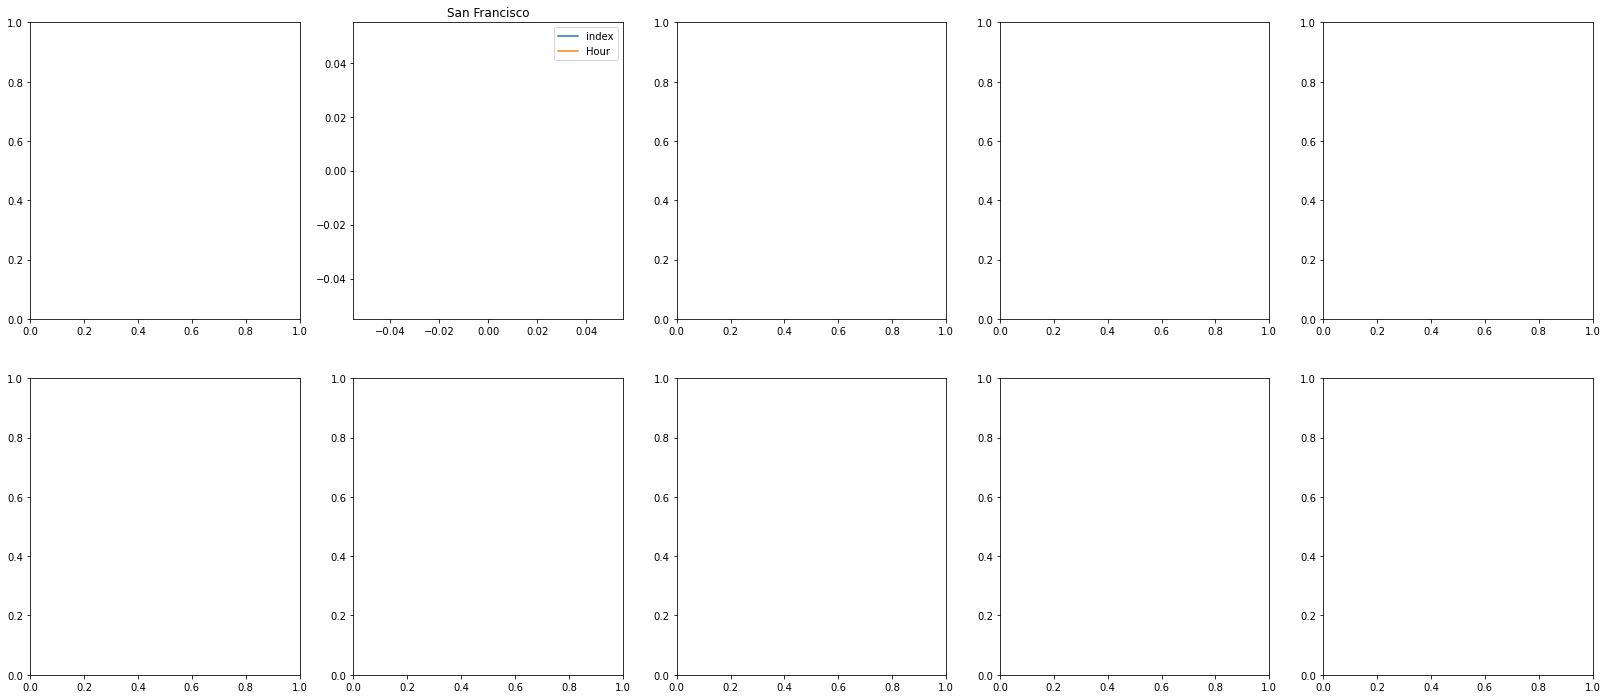

In [70]:
hours = [hour for hour, df in cleaned_df.groupby('Hour')]

atl_temp = temp_city[temp_city['City'] == ' Atlanta,GA']
atx_temp = temp_city[temp_city['City'] == ' Austin,TX']
bos_temp = temp_city[temp_city['City'] == ' Boston,MA']
dal_temp = temp_city[temp_city['City'] == ' Dallas,TX']
los_temp = temp_city[temp_city['City'] == ' Los Angeles,CA']
nye_temp = temp_city[temp_city['City'] == ' New York City,NY']
pdx_temp = temp_city[temp_city['City'] == ' Portland,ME']
por_temp = temp_city[temp_city['City'] == ' Portland,OR']
sf_temp = temp_city[temp_city['City'] == ' San Francisco,CA']
sea_temp = temp_city[temp_city['City'] == ' Seattle,WA']

sf_temp


df_sf = sf_temp['Hour'].value_counts().reset_index()
# df_2016 = sub_2016['month'].value_counts().reset_index().rename(columns={'index':'Month',
#                                                               'month':'Number Killed'})
# df_2017 = sub_2017['month'].value_counts().reset_index().rename(columns={'index':'Month',
#                                                               'month':'Number Killed'})
# df_2018 = sub_2018['month'].value_counts().reset_index().rename(columns={'index':'Month',
#                                                               'month':'Number Killed'})
# df_2019 = sub_2019['month'].value_counts().reset_index().rename(columns={'index':'Month',
#                                                               'month':'Number Killed'})
# df_2020 = sub_2020['month'].value_counts().reset_index().rename(columns={'index':'Month', 
#                                                                          'month':'Number Killed'})


fig, axes = plt.subplots(2, 5,figsize=(28,12))
# fig.suptitle("Sharing Year as X")
df_sf.plot(ax=axes[0,1], y= sf_data, title='San Francisco')
# df_2017.plot(ax=axes[0,2], title='2017')
# df_2018.plot(ax=axes[1,0], title='2018')
# df_2019.plot(ax=axes[1,1], title='2019')
# df_2020.plot(ax=axes[1,2], title='2020')